# Starbucks Location Scoring System
***
## Machine Learning I - Project 

*Authors:*  
**Amulya Jayanti** 	  | *EDA, Model Development*  
**Angus Ho** 		      | *Data Preparation, Clustering*  
**Ankit Agrawal** 	      | *Clustering, Tool Development*  
**Halleluya Mengesha**   | *Model Development, Data Preparation*  
**Jiaxin Lin** 		  | *Model Development, Evaluation*
  
*Feb 19, 2025*
***

# Part I - Data Preprocessing

## 1. Set Working Directory

In [1]:
import os

# Check the current working directory
print("Current Working Directory:", os.getcwd())

# Set a new working directory
new_dir = "/Users/halleluyamengesha/Desktop/UChicago/_Quarter_2/Machine Learning I/ML-I Project/Dataset"
os.chdir(new_dir)

# Verify the change
print("New Working Directory:", os.getcwd())

Current Working Directory: /Users/halleluyamengesha/Desktop/UChicago/_Quarter_2/Machine Learning I/ML-I Project
New Working Directory: /Users/halleluyamengesha/Desktop/UChicago/_Quarter_2/Machine Learning I/ML-I Project/Dataset


## 2. Import Necessary Packages

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

## 3. Load, Inspect and Clean Datasets

In [6]:
# Load

brands = pd.read_csv("brands.csv")
coffee_shops = pd.read_csv("coffee_shops.csv")
hotels = pd.read_csv("hotels.csv")
restaurants = pd.read_csv("restaurants.csv")

In [7]:
# Max columns display
pd.set_option('display.max_columns', None)

### 3.1. Brands Dataset

#### EDA and Cleaning

In [11]:
# Remove any leading or trailing whitespace from each column name
brands.columns = brands.columns.str.strip() 

# Initial Inspection
brands.head()

,brand,name,latitude,longitude,address,place_id,rating,user_ratings_total
0,Starbucks,Starbucks,24.127970,-110.314020,Calzada Forjadores de Sud California No 4390 C...,ChIJBzoSS_PTr4YR36cSEv5Nf3E,4.4,1176.0
1,Starbucks,Starbucks Plaza La Paz,24.115990,-110.340472,"Local L100, Pino Payas s/n, El Zacatal, La Paz",ChIJkyXKL9YsroYRoVDVI4VyHFQ,4.4,1104.0
2,McDonald's,McDonald's,24.142746,-110.313398,"5 de Febrero 1210, Zona Central, La Paz",ChIJs6UFUkfTr4YRAStZ0fNY_qM,3.9,1661.0
3,Walmart,Walmart,24.118635,-110.343115,"Blvd. Gral. Agustín Olachea, El Zacatal, La Paz",ChIJs-sn19ksroYROMPzQMrO9Dc,4.4,6952.0
4,Walmart,Chedraui,24.150042,-110.306920,"Isabel La Católica 1915, Zona Central, La Paz",ChIJGRM2c0LTr4YRCVVQyfslNSI,4.1,2194.0


In [12]:
print("✓ BRANDS DATASET ✓")

print("\n** Shape: **\n")
print(brands.shape)

print("\n** Info: **\n")
print(brands.info())

print("\n** Statistical Description: **\n")
print(brands.describe())

print("\n** Duplicates: **\n")
print(brands.duplicated().sum())

# Missing values
print("\n** Missing Values (Count): **\n")
print(brands.isnull().sum())

print("\n** Missing Values (Percentage): **\n")
(brands.isnull().sum() / len(brands)) * 100

✓ BRANDS DATASET ✓

** Shape: **

(166309, 8)

** Info: **

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166309 entries, 0 to 166308
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brand               166309 non-null  object 
 1   name                166306 non-null  object 
 2   latitude            166309 non-null  float64
 3   longitude           166309 non-null  float64
 4   address             166298 non-null  object 
 5   place_id            166309 non-null  object 
 6   rating              166309 non-null  float64
 7   user_ratings_total  166309 non-null  float64
dtypes: float64(4), object(4)
memory usage: 10.2+ MB
None

** Statistical Description: **

            latitude      longitude         rating  user_ratings_total
count  166309.000000  166309.000000  166309.000000       166309.000000
mean       38.048420     -92.619192       4.001678          848.093404
std         5.701295      

brand                 0.000000
name                  0.001804
latitude              0.000000
longitude             0.000000
address               0.006614
place_id              0.000000
rating                0.000000
user_ratings_total    0.000000
dtype: float64

In [16]:
# # Count unique values in categorical columns
# brands_categorical_columns = brands.select_dtypes(include=['object']).columns
# for col in brands_categorical_columns:
#     print(f"\nUnique values in {col}:")
#     print(brands[col].value_counts())
#     print(f"{col}: {brands[col].nunique()} unique values")

In [19]:
brands.dtypes

brand                  object
name                   object
latitude              float64
longitude             float64
address                object
place_id               object
rating                float64
user_ratings_total    float64
dtype: object

In [21]:
brands['brand'].nunique()

44

In [23]:
# Small number of missing values so drop
brands.dropna(subset=['name', 'address'], inplace=True)

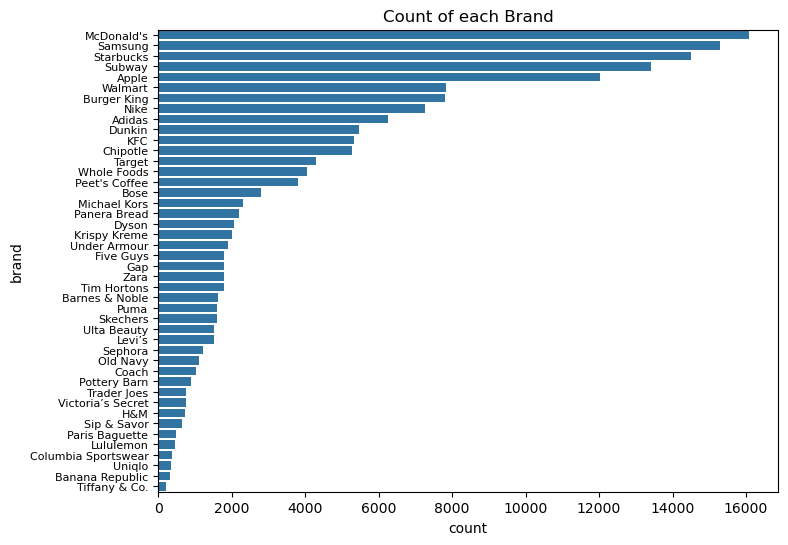

In [25]:
# # Value counts by brand
# print("\n** Brand Distribution **")
# print(brands['brand'].value_counts())

# Plot: Count of each brand
plt.figure(figsize=(8,6))
sns.countplot(y='brand', data=brands, 
              order=brands['brand'].value_counts().index)
plt.title('Count of each Brand')
plt.yticks(fontsize=8)
plt.show()

In [27]:
# # plt.figure(figsize=(6,4))
# sns.scatterplot(x='longitude', y='latitude', hue='brand', data=brands, alpha=0.6)
# plt.title('Geographical Distribution of Brands')
# plt.show()

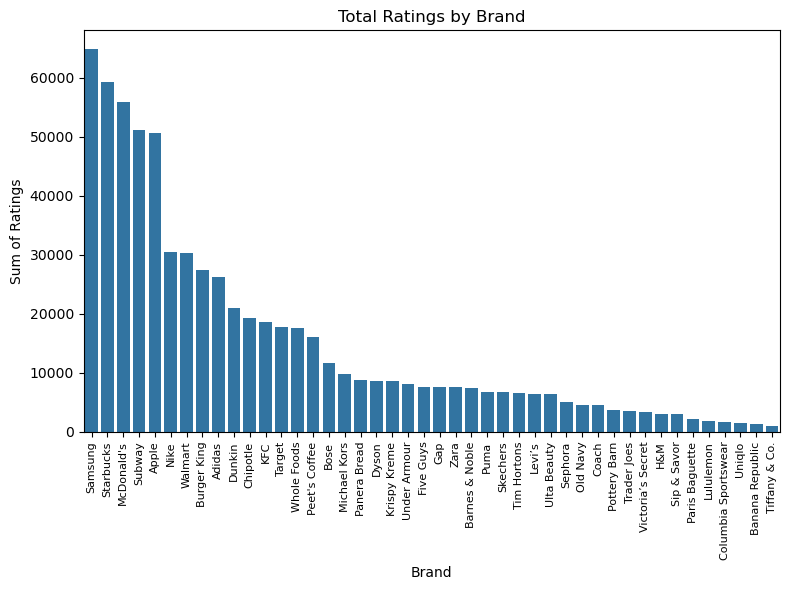

In [29]:
# Group by 'brand' and sum the 'rating'
brand_rating_sums = brands.groupby('brand')['rating'].sum().reset_index()

# Sort by summed rating
brand_rating_sums = brand_rating_sums.sort_values('rating', ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=brand_rating_sums, x='brand', y='rating')
plt.title('Total Ratings by Brand')
plt.xlabel('Brand')
plt.ylabel('Sum of Ratings')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()


In [31]:
# # Plot: Distribution of ratings
# plt.figure(figsize=(6,4))
# sns.histplot(brands['rating'], bins=20)
# plt.title('Distribution of Brand Ratings')
# plt.xlabel('Rating')
# plt.ylabel('Frequency')
# plt.show()

In [33]:
# # Explore relationship between rating and number of ratings
# plt.figure(figsize=(6,4))
# sns.scatterplot(x='user_ratings_total', y='rating', data=brands)
# plt.title('Rating vs. User Ratings Count')
# plt.xlabel('Total Ratings')
# plt.ylabel('Rating')
# plt.show()

        brand   category
0   Starbucks  Starbucks
1   Starbucks  Starbucks
2  McDonald's  Fast Food
3     Walmart     Retail
4     Walmart     Retail


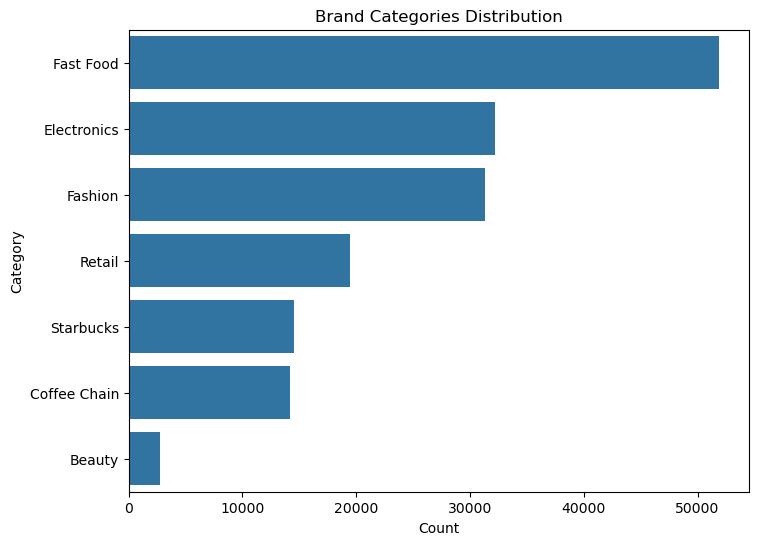

In [35]:
# Define brand category mapping
brand_categories = {

    "Starbucks": "Starbucks",
    
    # Coffee Chains
    "Dunkin": "Coffee Chain",
    "Peet's Coffee": "Coffee Chain",
    "Tim Hortons": "Coffee Chain",
    "Krispy Kreme": "Coffee Chain",
    "Sip & Savor": "Coffee Chain",
    "Paris Baguette": "Coffee Chain",

    # Fast Food
    "McDonald's": "Fast Food",
    "Subway": "Fast Food",
    "Burger King": "Fast Food",
    "KFC": "Fast Food",
    "Chipotle": "Fast Food",
    "Five Guys": "Fast Food",
    "Panera Bread": "Fast Food",

    # Retail
    "Walmart": "Retail",
    "Target": "Retail",
    "Whole Foods": "Retail",
    "Trader Joes": "Retail",
    "Barnes & Noble": "Retail",
    "Pottery Barn": "Retail",

    # Fashion
    "Nike": "Fashion",
    "Adidas": "Fashion",
    "Puma": "Fashion",
    "Skechers": "Fashion",
    "Under Armour": "Fashion",
    "Levi’s": "Fashion",
    "Gap": "Fashion",
    "Zara": "Fashion",
    "H&M": "Fashion",
    "Uniqlo": "Fashion",
    "Banana Republic": "Fashion",
    "Victoria’s Secret": "Fashion",
    "Tiffany & Co.": "Fashion",
    "Coach": "Fashion",
    "Michael Kors": "Fashion",
    "Lululemon": "Fashion",
    "Columbia Sportswear": "Fashion",
    "Old Navy": "Fashion",

    # Beauty
    "Sephora": "Beauty",
    "Ulta Beauty": "Beauty",

    # Electronics
    "Apple": "Electronics",
    "Samsung": "Electronics",
    "Bose": "Electronics",
    "Dyson": "Electronics",

}

# Create the 'category' column using the mapping
brands['category'] = brands['brand'].map(brand_categories)

# # Fill missing categories with 'Other'
# brands['category'].fillna("Other", inplace=True)

# Display the updated dataset
print(brands[['brand', 'category']].head())

plt.figure(figsize=(8,6))
sns.countplot(y=brands['category'], order=brands['category'].value_counts().index)
plt.title('Brand Categories Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


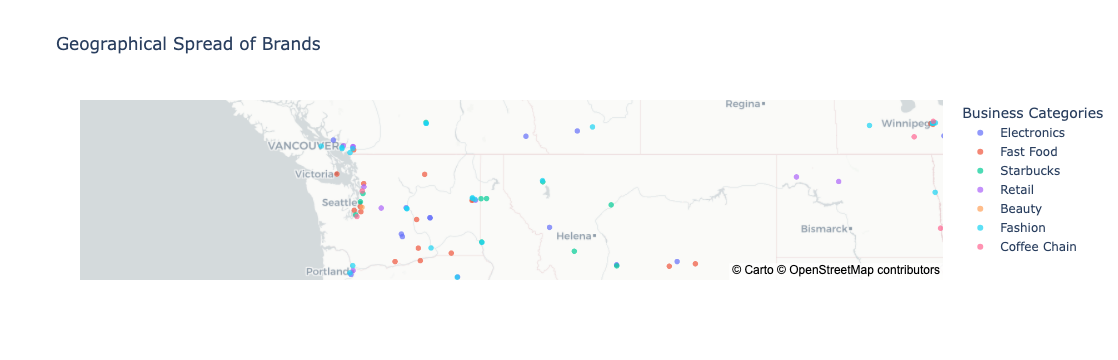

In [45]:
import plotly.express as px

# Create an interactive scatter plot with Plotly
fig = px.scatter_mapbox(
    brands.sample(1000), # Show only 500 points to reduce memory usage
    lat="latitude", 
    lon="longitude", 
    color="category", 
    size_max=10,
    opacity=0.7,
    hover_name="brand", 
    hover_data=["address", "rating", "user_ratings_total"],
    title="Geographical Spread of Brands",
    zoom=3,  # Adjust based on your dataset spread
    height=600
)

# Use a Mapbox basemap
fig.update_layout(
    mapbox_style="carto-positron",  # Clean and professional map style
    mapbox_zoom=4,  # Adjust initial zoom level based on dataset
    mapbox_center={"lat": brands["latitude"].mean(), "lon": brands["longitude"].mean()},  # Centered on data
    legend_title_text="Business Categories"
)

fig.show()


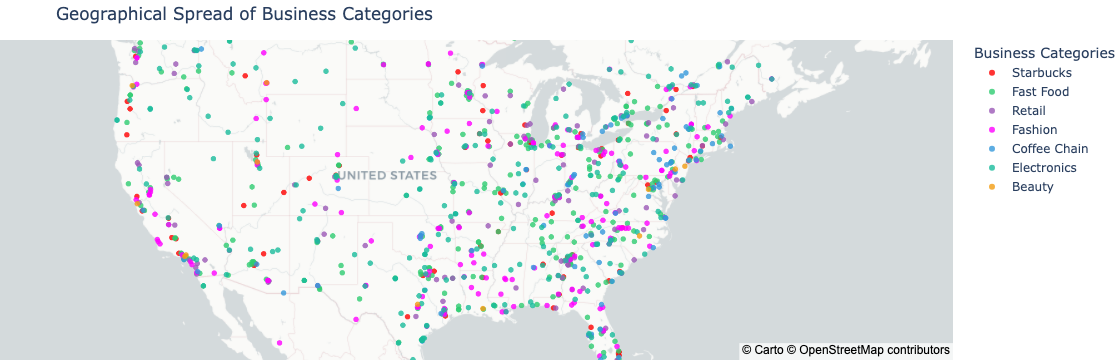

In [47]:
import plotly.express as px

# Define a custom color mapping for categories
category_colors = {
    "Starbucks": "red",  # Bright Red-Orange
    "Coffee Chain": "#3498DB",  # Blue
    "Fast Food": "#2ECC71",  # Green
    "Retail": "#9B59B6",  # Purple
    "Fashion": "magenta",  # Red
    "Beauty": "#F39C12",  # Orange-Yellow
    "Electronics": "#1ABC9C",  # Teal
}

# Create an interactive scatter plot with Plotly
fig = px.scatter_mapbox(
    brands.sample(1000), 
    lat="latitude", 
    lon="longitude", 
    color="category",  
    color_discrete_map=category_colors,  # Use custom color mapping
    size_max=12,  # Slightly larger points for better visualization
    opacity=0.8,  # Increase visibility
    hover_name="brand",  
    hover_data=["address", "rating", "user_ratings_total"],
    title="Geographical Spread of Business Categories",
    zoom=2,  
    height=700  # Increase height for better clarity
)

# Use a Mapbox basemap
fig.update_layout(
    mapbox_style="carto-positron",  # Clean, professional look
    mapbox_zoom=3,  
    mapbox_center={"lat": brands["latitude"].mean(), "lon": brands["longitude"].mean()},  
    legend_title_text="Business Categories",
    margin={"r":0, "t":40, "l":0, "b":0}  # Remove excess margins
)

fig.show()


In [53]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Select relevant features
features = ['latitude', 'longitude', 'rating', 'user_ratings_total', 'category']

# Drop missing values (if any)
brands_cluster = brands[features].dropna().reset_index(drop=True)

# One-Hot Encode the 'category' column
encoder = OneHotEncoder(sparse_output=False)  # Keep all categories
category_encoded = encoder.fit_transform(brands_cluster[['category']])

# Convert to DataFrame
category_df = pd.DataFrame(category_encoded, columns=encoder.get_feature_names_out(['category']))

# Merge one-hot encoded data with numeric features
brands_cluster = pd.concat([brands_cluster.drop(columns=['category']).reset_index(drop=True), 
                            category_df.reset_index(drop=True)], axis=1)

# Standardize only numerical features (excluding latitude & longitude)
scaler = StandardScaler()
columns_to_scale = ['rating', 'user_ratings_total'] + list(category_df.columns)

brands_scaled = brands_cluster.copy()  # Preserve original lat/long
brands_scaled[columns_to_scale] = scaler.fit_transform(brands_scaled[columns_to_scale])

# **Keep latitude & longitude in original form**
print("✅ Data Ready for Clustering. Shape:", brands_scaled.shape)


✅ Data Ready for Clustering. Shape: (166298, 11)


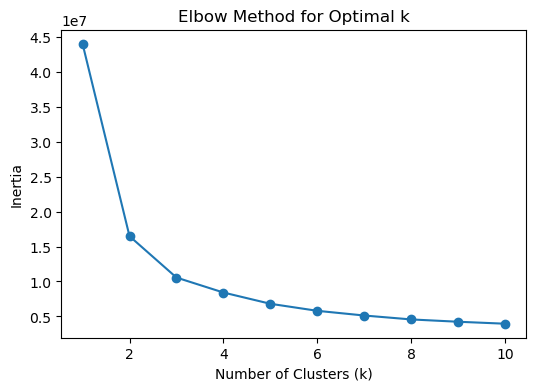

In [55]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine optimal k using Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(brands_scaled)  # Excluding latitude & longitude from scaling was done earlier
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



In [57]:
# Apply K-Means Clustering
optimal_k = 4

# Run K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
brands_cluster['kmeans_cluster'] = kmeans.fit_predict(brands_scaled)

# Check cluster distribution
print("✅ K-Means Cluster Distribution:")
print(brands_cluster['kmeans_cluster'].value_counts())


✅ K-Means Cluster Distribution:
kmeans_cluster
2    56846
0    41436
1    35442
3    32574
Name: count, dtype: int64


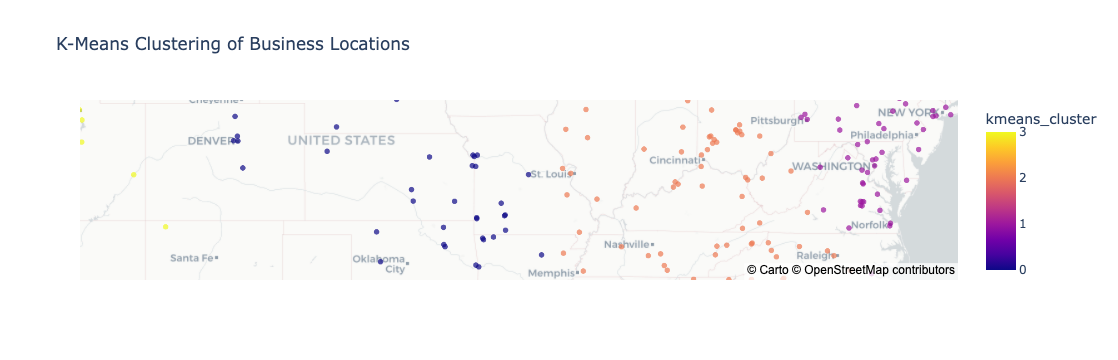

In [77]:
import plotly.express as px

# Restore the 'category' column by extracting the original category names
category_columns = [col for col in brands_cluster.columns if col.startswith("category_")]

# Find the category with the highest value (i.e., the original category)
brands_cluster['category'] = brands_cluster[category_columns].idxmax(axis=1).str.replace("category_", "")
fig = px.scatter_mapbox(
    brands_cluster.sample(500), 
    lat="latitude", 
    lon="longitude", 
    color="kmeans_cluster",  # Color by K-Means cluster
    size_max=10,
    opacity=0.7,
    hover_name="category",
    hover_data=["rating", "user_ratings_total"],
    title="K-Means Clustering of Business Locations",
    zoom=5,  
    height=700
)

fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=4,
    mapbox_center={"lat": brands["latitude"].mean(), "lon": brands["longitude"].mean()},
    legend_title_text="K-Means Clusters"
)

fig.show()


In [112]:
import psutil
print(f"Available RAM: {psutil.virtual_memory().available / 1e9:.2f} GB")


Available RAM: 5.21 GB


In [61]:
from sklearn.cluster import DBSCAN

# Run DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)  # Adjust eps & min_samples as needed
brands_cluster['dbscan_cluster'] = dbscan.fit_predict(brands_scaled)

# Check cluster distribution
print("✅ DBSCAN Cluster Distribution:")
print(brands_cluster['dbscan_cluster'].value_counts())  # -1 represents noise points (outliers)


✅ DBSCAN Cluster Distribution:
dbscan_cluster
-1       57688
 106     14743
 6        2278
 883      1993
 83       1756
         ...  
 1221        5
 455         5
 425         4
 566         1
 430         1
Name: count, Length: 1265, dtype: int64


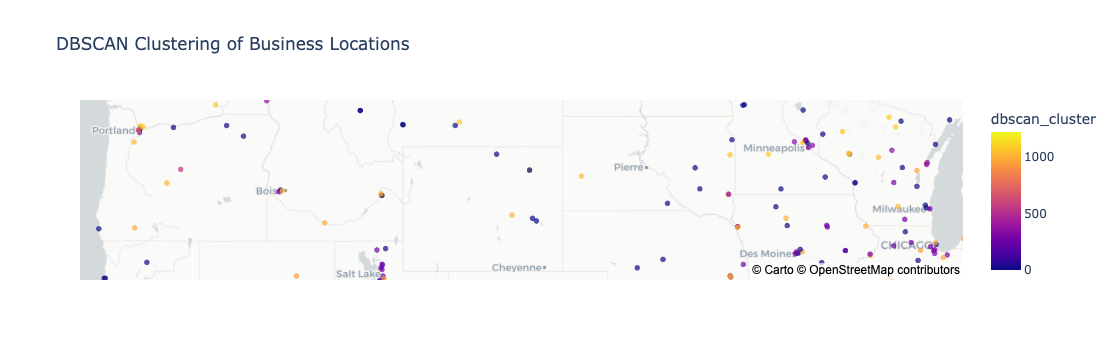

In [79]:
import plotly.express as px

# Restore the 'category' column by extracting the original category names
category_columns = [col for col in brands_cluster.columns if col.startswith("category_")]

# Find the category with the highest value (i.e., the original category)
brands_cluster['category'] = brands_cluster[category_columns].idxmax(axis=1).str.replace("category_", "")

# Create an interactive scatter plot with Plotly
fig = px.scatter_mapbox(
    brands_cluster.sample(1000), 
    lat="latitude", 
    lon="longitude", 
    color="dbscan_cluster",  # Color by DBSCAN cluster
    size_max=10,
    opacity=0.7,
    hover_name="category",  # Now works correctly!
    hover_data=["rating", "user_ratings_total"],
    title="DBSCAN Clustering of Business Locations",
    zoom=3,  
    height=700
)

fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=4,
    mapbox_center={"lat": brands["latitude"].mean(), "lon": brands["longitude"].mean()},
    legend_title_text="DBSCAN Clusters"
)

fig.show()


#### 2. Coffee Shops Dataset

In [152]:
# Remove any leading or trailing whitespace from each column name
coffee_shops.columns = coffee_shops.columns.str.strip() 

# Initial Inspection
coffee_shops.head()

,name,latitude,longitude,address,place_id,rating,user_ratings_total
0,San Carlos,24.789244,-112.104533,San Carlos,ChIJ4R1FusEFs4YRxnBZeRDueG4,NaN,NaN
1,Magdalena Bay Island Glamping,24.627065,-112.129587,NaN,ChIJy9utFPfjsoYRTkkPZjBrG0o,4.6,22.0
2,Tent camp,24.753924,-112.263141,NaN,ChIJtwIsPwAhs4YRnMY_fTwwL-o,NaN,NaN
3,Бліндаж лапок,24.658488,-112.168009,Corso,ChIJNypRDQDhsoYRqpzLJ7Mnbhk,5.0,3.0
4,I.Hazine,24.786867,-112.286487,NaN,ChIJcQ-7-XMjs4YR6sScGKlMjtU,NaN,NaN


In [268]:
print("✓ COFFEE SHOPS DATASET ✓")

print("\n** Shape: **\n")
print(coffee_shops.shape)

print("\n** Info: **\n")
print(coffee_shops.info())

print("\n** Statistical Description: **\n")
print(coffee_shops.describe())

print("\n** Duplicates: **\n")
print(coffee_shops.duplicated().sum())

# Missing values
print("\n** Missing Values (Count): **\n")
print(coffee_shops.isnull().sum())

print("\n** Missing Values (Percentage): **\n")
(coffee_shops.isnull().sum() / len(coffee_shops)) * 100

✓ COFFEE SHOPS DATASET ✓

** Shape: **

(163465, 7)

** Info: **

<class 'pandas.core.frame.DataFrame'>
Index: 163465 entries, 0 to 165156
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   name                163465 non-null  object 
 1   latitude            163465 non-null  float64
 2   longitude           163465 non-null  float64
 3   address             163465 non-null  object 
 4   place_id            163465 non-null  object 
 5   rating              126835 non-null  float64
 6   user_ratings_total  126835 non-null  float64
dtypes: float64(4), object(3)
memory usage: 10.0+ MB
None

** Statistical Description: **

            latitude      longitude         rating  user_ratings_total
count  163465.000000  163465.000000  126835.000000       126835.000000
mean       38.541089     -97.086083       4.231265          379.846998
std         6.745682      14.725120       0.716994         1406.084005
min 

name                   0.000000
latitude               0.000000
longitude              0.000000
address                0.000000
place_id               0.000000
rating                22.408467
user_ratings_total    22.408467
dtype: float64

In [266]:
# Small number of missing values so drop
coffee_shops.dropna(subset=['address'], inplace=True)

In [202]:
# # Count unique values in categorical columns
# coffee_shops_categorical_columns = coffee_shops.select_dtypes(include=['object']).columns
# for col in coffee_shops_categorical_columns:
#     print(f"\nUnique values in {col}:")
#     print(coffee_shops[col].value_counts())
#     print(f"{col}: {coffee_shops[col].nunique()} unique values")

In [198]:
coffee_shops.dtypes

name                   object
latitude              float64
longitude             float64
address                object
place_id               object
rating                float64
user_ratings_total    float64
dtype: object

In [200]:
coffee_shops['name'].nunique()

134480

#### 3. Hotels Dataset

In [156]:
# Remove any leading or trailing whitespace from each column name
hotels.columns = hotels.columns.str.strip() 

# Initial Inspection
hotels.head()

,HotelName,Address,cityName,HotelRating,PinCode,lat,lng
0,Sunbelt Lodge Motel,1903 Veterans Memorial Drive AbbevilleLouisian...,"Abbeville, Louisiana",TwoStar,LA 70510,29.980600,-92.11452
1,Budget Inn & Suites,2115 Charity Street AbbevilleLouisiana 70510,"Abbeville, Louisiana",TwoStar,LA 70510,29.973150,-92.11281
2,Best Western Abbeville Inn & Suites,3515 Veterans Memorial Dr Abbeville AbbevilleL...,"Abbeville, Louisiana",TwoStar,70510,29.967878,-92.08536
3,Motel 6 Abbeville LA,3523 Veterans Memorial Drive AbbevilleLouisian...,"Abbeville, Louisiana",TwoStar,70510,29.968056,-92.08443
4,Days Inn by Wyndham Abbeville,730 Veterans Memorial Dr AbbevilleLouisiana 70...,"Abbeville, Louisiana",TwoStar,70510,29.981226,-92.12469


In [166]:
print("✓ HOTELS DATASET ✓")

print("\n** Shape: **\n")
print(hotels.shape)

print("\n** Info: **\n")
print(hotels.info())

print("\n** Statistical Description: **\n")
print(hotels.describe())

print("\n** Duplicates: **\n")
print(hotels.duplicated().sum())

# Missing values
print("\n** Missing Values (Count): **\n")
print(hotels.isnull().sum())

print("\n** Missing Values (Percentage): **\n")
(hotels.isnull().sum() / len(hotels)) * 100

✓ HOTELS DATASET ✓

** Shape: **

(139311, 7)

** Info: **

<class 'pandas.core.frame.DataFrame'>
Index: 139311 entries, 0 to 139867
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   hotel_name    139311 non-null  object 
 1   address       139311 non-null  object 
 2   city_name     139311 non-null  object 
 3   hotel_rating  139311 non-null  object 
 4   pin_code      139311 non-null  object 
 5   latitude      139311 non-null  float64
 6   longitude     139311 non-null  float64
dtypes: float64(2), object(5)
memory usage: 8.5+ MB
None

** Statistical Description: **

            latitude      longitude
count  139311.000000  139311.000000
mean       35.309326     -94.912007
std         6.623045      21.476320
min       -84.403533    -166.551308
25%        30.231775    -107.841130
50%        35.588413     -87.440690
75%        40.198819     -81.446349
max        70.227010     169.198510

** Duplicates: **

0

**

hotel_name      0.0
address         0.0
city_name       0.0
hotel_rating    0.0
pin_code        0.0
latitude        0.0
longitude       0.0
dtype: float64

In [206]:
hotels.dtypes

hotel_name       object
address          object
city_name        object
hotel_rating     object
pin_code         object
latitude        float64
longitude       float64
dtype: object

In [214]:
hotels['hotel_rating'].nunique()

6

In [212]:
# Count unique values in categorical columns
hotels_categorical_columns = hotels.select_dtypes(include=['object']).columns
for col in hotels_categorical_columns:
    print(f"\nUnique values in {col}:")
    print(hotels[col].value_counts())
    print(f"{col}: {hotels[col].nunique()} unique values")


Unique values in hotel_name:
hotel_name
Quality Inn                      428
Rodeway Inn                      320
Econo Lodge                      305
Quality Inn & Suites             257
Comfort Inn & Suites             220
                                ... 
Sierra Bluff Studio                1
White Cloud Retreat Townhouse      1
Columbine 301                      1
River Mtn Lodge W110C              1
Zion Ponderosa Ranch Resort        1
Name: count, Length: 92176, dtype: int64
hotel_name: 92176 unique values

Unique values in address:
address
Various Addresses                                                              231
2737 S Kihei Rd                                                                106
510 Gulf Shore Drive                                                            99
1246 Fulgur St                                                                  98
1870 Ho'one Road                                                                81
                             

In [160]:
# Rename columns for consistency
hotels.rename(columns={"HotelName": "hotel_name"}, inplace=True)
hotels.rename(columns={"cityName": "city_name"}, inplace=True)
hotels.rename(columns={"HotelRating": "hotel_rating"}, inplace=True)
hotels.rename(columns={"PinCode": "pin_code"}, inplace=True)
hotels.rename(columns={"lat": "latitude"}, inplace=True)
hotels.rename(columns={"lng": "longitude"}, inplace=True)

# Change column names to lowercase
hotels.columns = hotels.columns.str.lower()

In [162]:
# Drop duplicates
hotels.drop_duplicates(inplace=True)

In [164]:
# Small number of missing values so drop
hotels.dropna(inplace=True)

#### 4. Restaurants Dataset

In [168]:
# Remove any leading or trailing whitespace from each column name
restaurants.columns = restaurants.columns.str.strip() 

# Initial Inspection
restaurants.head()

,name,latitude,longitude,address,place_id,rating,user_ratings_total
0,Isla Magdalena,24.634444,-112.139444,Puerto Magdalena,ChIJFZ6WEmzjsoYR7rJXMyUVfj0,5.0,1.0
1,Blue Bay Restaurant🍴,24.632167,-112.138309,"B.C.S B.C.S MX, Puerto Magdalena",ChIJjTjCbLnjsoYRcU93RkgkLw0,4.2,5.0
2,Chejo’s Team,24.633820,-112.139023,Unnamed Road,ChIJgXmgzNHjsoYRyazHLFe1IU8,4.9,27.0
3,Magbay Paradise,24.638687,-112.140312,"JVQ5+FVP, Puerto Magdalena",ChIJaRIeLfjjsoYRRjLWG863Wvk,4.8,8.0
4,Cooperativa Escolar,24.785868,-112.107298,"Fondeport, Puerto San Carlos",ChIJy_gHdmgcs4YR7lVw0RHoSwA,4.1,9.0


In [174]:
print("✓ HOTELS DATASET ✓")

print("\n** Shape: **\n")
print(restaurants.shape)

print("\n** Info: **\n")
print(restaurants.info())

print("\n** Statistical Description: **\n")
print(restaurants.describe())

print("\n** Duplicates: **\n")
print(restaurants.duplicated().sum())

# Missing values
print("\n** Missing Values (Count): **\n")
print(restaurants.isnull().sum())

print("\n** Missing Values (Percentage): **\n")
(restaurants.isnull().sum() / len(restaurants)) * 100

✓ HOTELS DATASET ✓

** Shape: **

(96092, 7)

** Info: **

<class 'pandas.core.frame.DataFrame'>
Index: 96092 entries, 0 to 100331
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                96092 non-null  object 
 1   latitude            96092 non-null  float64
 2   longitude           96092 non-null  float64
 3   address             96092 non-null  object 
 4   place_id            96092 non-null  object 
 5   rating              96092 non-null  float64
 6   user_ratings_total  96092 non-null  float64
dtypes: float64(4), object(3)
memory usage: 5.9+ MB
None

** Statistical Description: **

           latitude     longitude        rating  user_ratings_total
count  96092.000000  96092.000000  96092.000000        96092.000000
mean      38.015764    -95.718011      4.201475          721.127721
std        6.457951     14.683818      0.482343         1362.600646
min       24.053788   -125.557998 

name                  0.0
latitude              0.0
longitude             0.0
address               0.0
place_id              0.0
rating                0.0
user_ratings_total    0.0
dtype: float64

In [172]:
# Small number of missing values so drop
restaurants.dropna(inplace=True)